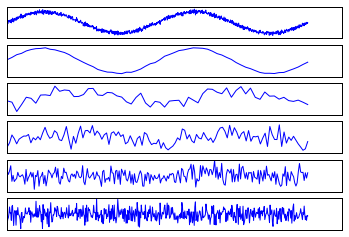

In [1]:
import numpy as np
from scipy.signal import fftconvolve
from matplotlib import pyplot as plt
%matplotlib inline

def dwt(X,L,H,n) :
    A = X
    Ds = []
    for i in xrange(n) :
        D = fftconvolve(A,H)[1::2]
        Ds.append(D)
        A = fftconvolve(A,L)[1::2]
    Ds.append(A)
    return Ds[::-1]

L = np.ones(2)/np.sqrt(2)
H = np.array([-1,1])/np.sqrt(2)

domain = np.linspace(0, 4*np.pi, 1024)
noise =  np.random.randn(1024)*.1
noisysin = np.sin(domain) + noise
coeffs = dwt(noisysin, L, H, 4)

plt.subplot(611)
plt.plot(domain,noisysin)
plt.tick_params(top='off',bottom='off',right='off',left='off',labelleft='off',labelbottom='off')

for i in xrange(5) :
    plt.subplot(6,1,i+2)
    domain = np.linspace(0,4*np.pi,len(coeffs[i]))
    plt.plot(domain,coeffs[i])
    plt.tick_params(top='off',bottom='off',right='off',left='off',labelleft='off',labelbottom='off')

In [2]:
def uwt(Ds,L,H) :
    A = Ds[0]
    D = Ds[1:]
    
    for i in xrange(len(D)) :
        up_A = np.zeros(2*A.size)
        up_A[::2] = A
        
        up_D = np.zeros(2*D[i].size)
        up_D[::2] = D[i]
        A = fftconvolve(up_A,L)[:-1] + fftconvolve(up_D,H)[:-1]
        
    return A

In [3]:
signal = np.random.random(2**5)
L = np.ones(2)/np.sqrt(2)
H1 = np.array([1,-1])/np.sqrt(2)
D = dwt(signal,L,H,2)
U = uwt(D,L,H1)
if np.allclose(signal,U) == False :
    print "Not recovered."
    print signal
    print U
else :
    print "Recovered!! =D"

Recovered!! =D


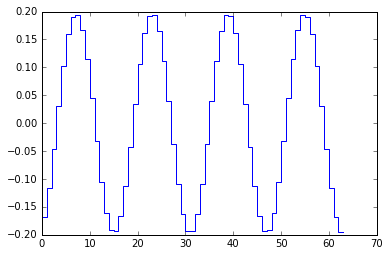

In [5]:
import pywt

f = np.sin(np.linspace(0,8*np.pi, 256))
fw = pywt.wavedec(f, 'haar')
plt.plot(fw[-2], linestyle='steps')

In [6]:
f_prime = pywt.waverec(fw, 'haar')
np.allclose(f_prime, f)

True

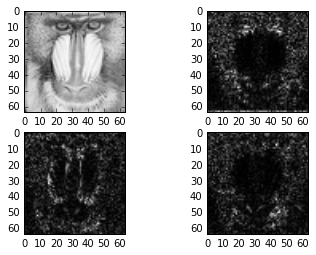

In [13]:
from scipy.misc import imread
mandrill = imread('mandrill.png', True)
lw = pywt.dwt2(mandrill, 'db4', mode='per')
plt.subplot(221)
plt.imshow(np.abs(lw[0]), cmap='gray')
plt.subplot(222)
plt.imshow(np.abs(lw[1][0]), cmap='gray')
plt.subplot(223)
plt.imshow(np.abs(lw[1][1]), cmap='gray')
plt.subplot(224)
plt.imshow(np.abs(lw[1][2]), cmap='gray')

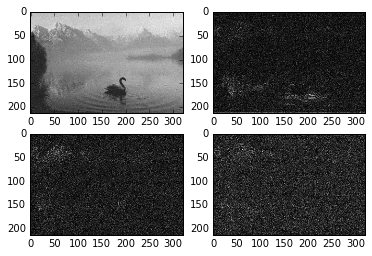

In [16]:
slp = imread('swanlake_polluted.jpg', True)
lw = pywt.dwt2(slp, 'db4', mode='per')
plt.subplot(221)
plt.imshow(np.abs(lw[0]), cmap='gray')
plt.subplot(222)
plt.imshow(np.abs(lw[1][0]), cmap='gray')
plt.subplot(223)
plt.imshow(np.abs(lw[1][1]), cmap='gray')
plt.subplot(224)
plt.imshow(np.abs(lw[1][2]), cmap='gray')

In [18]:
def clean_image(filename) :
    image = imread(filename,True)
    wavelet = pywt.Wavelet('haar')
    WaveletCoeffs = pywt.wavedec2(image,wavelet)
    new_image = pywt.waverec2(WaveletCoeffs[:-1], wavelet)
    return new_image

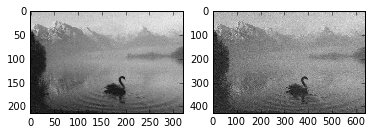

In [20]:
cleaner_swan = clean_image('swanlake_polluted.jpg')
plt.subplot(121)
plt.imshow(cleaner_swan,cmap = 'gray')
plt.subplot(122)
plt.imshow(imread('swanlake_polluted.jpg', True),cmap = 'gray')